# Practica 06: Análisis de Datos caso Salario de Especialistas en  Inteligencia Aartificial y Machine Learning

#### Creado por: Carlos Jesus Carballo Cruz 220472
#### Asignatura: Extraccion de Conocimiento en Bases de Datos 
#### PE: Ingieneria en Desarrollo y Gestion de Software

In [13]:
# Carga de Paquetes y Librerias a utilizar
# Básicas (Standard)

import numpy as np #Sirve par apoder ealizar procesamientos basicos numericos de datos cuantitativos
import pandas as pd #Sirve para reutilizar los procesos ETL en un conjunto de Datos
import time #Sirve para la manipulacion de datos en diferentes formatos de tiempo

# Graficadores (Plots)

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


### 1.Importar el origen de los datos

##### Nos aseguramos que el archivp de origen de datos se encuentre en la carpeta del proyecto

In [14]:
!cd
!dir

C:\Users\carlo\9no B Desarollo
 El volumen de la unidad C es OS
 El número de serie del volumen es: C6CF-C41C

 Directorio de C:\Users\carlo\9no B Desarollo

17/06/2025  12:49 p. m.    <DIR>          .
16/06/2025  11:35 p. m.    <DIR>          ..
15/06/2025  03:51 p. m.    <DIR>          .ipynb_checkpoints
17/06/2025  12:45 p. m.            70,050 Practica 06.ipynb
15/06/2025  07:09 p. m.         4,127,765 salaries.csv
               2 archivos      4,197,815 bytes
               3 dirs  57,622,171,648 bytes libres


Importamos los datos en una nueva 

In [16]:
df = pd.read_csv('salaries.csv')

Corroboramos el tipo de dato en nuetro objeto

In [17]:
print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73158 entries, 0 to 73157
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73157 non-null  float64
 1   experience_level    73156 non-null  object 
 2   employment_type     73157 non-null  object 
 3   job_title           73154 non-null  object 
 4   salary              73156 non-null  float64
 5   salary_currency     73151 non-null  object 
 6   salary_in_usd       73154 non-null  float64
 7   employee_residence  73156 non-null  object 
 8   remote_ratio        73152 non-null  float64
 9   company_location    73156 non-null  object 
 10  company_size        73156 non-null  object 
dtypes: float64(4), object(7)
memory usage: 6.1+ MB


Utiliza comandos para conocer las dimenciones de DataFrame

 ### 2. Revisar la importacion de los datos y conocer su composicion de la muestra

Utilizamos comandos para conocer kas dimenciones de DataFrame

In [11]:
df.size

804804

In [12]:
print(len(df)) ## Devuelve el total de tuplas o registros, iteraciones de DataFrame

73164


Consultas Basicas sobre el DataFrame

In [17]:
print(df.head) ## Devuelve los primeros y los ultimos 5 registros o tuplas de data frame

<bound method NDFrame.head of        work_year experience_level employment_type                 job_title  \
0           2025               SE              FT        Data Product Owner   
1           2025               SE              FT        Data Product Owner   
2           2025               SE              FT        Data Product Owner   
3           2025               SE              FT        Data Product Owner   
4           2025               SE              FT                  Engineer   
...          ...              ...             ...                       ...   
73143       2020               SE              FT            Data Scientist   
73144       2021               MI              FT  Principal Data Scientist   
73145       2020               EN              FT            Data Scientist   
73146       2020               EN              CT     Business Data Analyst   
73147       2021               SE              FT            Data Scientist   

        salary salary

In [26]:
df.tail() ## Devuelve los ultimos datos del DataFrame, si no se especifica cuantos automaticamente devuelve los ultimos 5

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
73143,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
73144,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
73145,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
73146,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
73147,2021,SE,FT,Data Scientist,7000000,INR,94665,IN,50,IN,L


In [24]:
df.describe() ## Realiza un reporte estadisticos sobre columnas completamente numericos (cuantitativos)

,work_year,salary,salary_in_usd,remote_ratio
count,73148.000000,7.314800e+04,73148.000000,73148.000000
mean,2023.831192,1.625534e+05,158013.748619,21.582955
std,0.477551,1.925761e+05,72501.304728,41.023051
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.069575e+05,106890.000000,0.000000
50%,2024.000000,1.480000e+05,147500.000000,0.000000
75%,2024.000000,2.000000e+05,199700.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [7]:
df.isnull() ## Mapea la matriz original con una matriz

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
73154,False,True,True,True,True,True,True,True,True,True,True
73155,False,False,False,False,False,False,False,False,False,False,False
73156,False,False,False,False,False,False,False,False,False,False,False
73157,False,True,True,True,True,True,True,True,True,True,True


In [11]:
df.notnull() ## Realiza un mapeo de la matriz original colocando valores bolaneos de
            ## acuerdo a la condicion de si es nulo

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
73154,True,False,False,False,False,False,False,False,False,False,False
73155,True,True,True,True,True,True,True,True,True,True,True
73156,True,True,True,True,True,True,True,True,True,True,True
73157,True,False,False,False,False,False,False,False,False,False,False


### 3. Transformar los Datos para su Ánalisis

In [26]:
df_duplicados_eliminados= df.drop_duplicates() ## Este metodo elimina los datos duplicados en base al criterio de la totalidad de los datos, esto se debe realizar
                    ## con extrema cautela dato que si no se tiene un atributo indentificar se alteraran resultados esperados

In [27]:
df_duplicados_eliminados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34034 entries, 0 to 73157
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           34033 non-null  float64
 1   experience_level    34032 non-null  object 
 2   employment_type     34033 non-null  object 
 3   job_title           34030 non-null  object 
 4   salary              34032 non-null  float64
 5   salary_currency     34027 non-null  object 
 6   salary_in_usd       34030 non-null  float64
 7   employee_residence  34032 non-null  object 
 8   remote_ratio        34028 non-null  float64
 9   company_location    34032 non-null  object 
 10  company_size        34032 non-null  object 
dtypes: float64(4), object(7)
memory usage: 3.1+ MB


Eliminar filas vacias o nulas

In [28]:
df_vacios_eliminados= df.dropna()

In [29]:
df_vacios_eliminados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73148 entries, 1 to 73157
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73148 non-null  float64
 1   experience_level    73148 non-null  object 
 2   employment_type     73148 non-null  object 
 3   job_title           73148 non-null  object 
 4   salary              73148 non-null  float64
 5   salary_currency     73148 non-null  object 
 6   salary_in_usd       73148 non-null  float64
 7   employee_residence  73148 non-null  object 
 8   remote_ratio        73148 non-null  float64
 9   company_location    73148 non-null  object 
 10  company_size        73148 non-null  object 
dtypes: float64(4), object(7)
memory usage: 6.7+ MB


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73158 entries, 0 to 73157
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73157 non-null  float64
 1   experience_level    73156 non-null  object 
 2   employment_type     73157 non-null  object 
 3   job_title           73154 non-null  object 
 4   salary              73156 non-null  float64
 5   salary_currency     73151 non-null  object 
 6   salary_in_usd       73154 non-null  float64
 7   employee_residence  73156 non-null  object 
 8   remote_ratio        73152 non-null  float64
 9   company_location    73156 non-null  object 
 10  company_size        73156 non-null  object 
dtypes: float64(4), object(7)
memory usage: 6.1+ MB


In [31]:
df_eliminar_sin_salario = df.dropna(subset=['salary_in_usd'])

In [32]:
df_eliminar_sin_salario.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73154 entries, 1 to 73157
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73154 non-null  float64
 1   experience_level    73154 non-null  object 
 2   employment_type     73154 non-null  object 
 3   job_title           73152 non-null  object 
 4   salary              73154 non-null  float64
 5   salary_currency     73150 non-null  object 
 6   salary_in_usd       73154 non-null  float64
 7   employee_residence  73154 non-null  object 
 8   remote_ratio        73150 non-null  float64
 9   company_location    73154 non-null  object 
 10  company_size        73154 non-null  object 
dtypes: float64(4), object(7)
memory usage: 6.7+ MB


In [33]:
print("DataFrame Original:")
print(len(df))
print("DataFrame sin datos nulos en la columna:")
print(len(df_vacios_eliminados))
print("DataFrame sin datos nulos en la columna Salary_in_usd:")
print(len(df_eliminar_sin_salario))

DataFrame Original:
73158
DataFrame sin datos nulos en la columna:
73148
DataFrame sin datos nulos en la columna Salary_in_usd:
73154


Reemplazar los valores nulos con un valor especifico

In [34]:
df_valoresNulosSustituidos = df.fillna(value='N/A')

Verificacmos la estructura del nuevo DataFrame

In [35]:
df_valoresNulosSustituidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73158 entries, 0 to 73157
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           73158 non-null  object
 1   experience_level    73158 non-null  object
 2   employment_type     73158 non-null  object
 3   job_title           73158 non-null  object
 4   salary              73158 non-null  object
 5   salary_currency     73158 non-null  object
 6   salary_in_usd       73158 non-null  object
 7   employee_residence  73158 non-null  object
 8   remote_ratio        73158 non-null  object
 9   company_location    73158 non-null  object
 10  company_size        73158 non-null  object
dtypes: object(11)
memory usage: 6.1+ MB


Lo comparamos con el Original

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73158 entries, 0 to 73157
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73157 non-null  float64
 1   experience_level    73156 non-null  object 
 2   employment_type     73157 non-null  object 
 3   job_title           73154 non-null  object 
 4   salary              73156 non-null  float64
 5   salary_currency     73151 non-null  object 
 6   salary_in_usd       73154 non-null  float64
 7   employee_residence  73156 non-null  object 
 8   remote_ratio        73152 non-null  float64
 9   company_location    73156 non-null  object 
 10  company_size        73156 non-null  object 
dtypes: float64(4), object(7)
memory usage: 6.1+ MB


¿que pasaria si con el nuevo DataFrame ejecuto un nuevo describe()?

In [38]:
df_valoresNulosSustituidos.describe()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,73159.0,73159,73159,73159,73159.0,73159,73159.0,73159,73159.0,73159,73159
unique,8.0,5,5,291,7095.0,26,7703.0,94,4.0,88,4
top,2024.0,SE,FT,Data Scientist,160000.0,USD,160000.0,US,0.0,US,M
freq,62228.0,42930,72816,11445,1437.0,69424,1426.0,65990,57224.0,66041,70544


Sustituir Valores nulos de columnas Especificadas, con un valor especifico(Salary y salary_in_USD) por 0.0

In [40]:
df_valoresNulosSustituidos = df.fillna({'salary':0.0, 'salary_in_usd':0.0})

Corroborramos la sustitucion

In [41]:
df_valoresNulosSustituidos

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
1,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
2,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
3,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
4,2025.0,SE,FT,Engineer,143000.0,USD,143000.0,US,0.0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
73154,2020.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
73155,2020.0,EN,CT,Business Data Analyst,100000.0,USD,100000.0,US,100.0,US,L
73156,2021.0,SE,FT,Data Scientist,7000000.0,INR,94665.0,IN,50.0,IN,L
73157,2021.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN


Si realizamos el resumen estadistico aun hay datos estadisticos

In [42]:
df_valoresNulosSustituidos.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,73158.000000,7.315900e+04,73159.000000,73152.000000
mean,2023.831338,1.625356e+05,157996.551128,21.581775
std,0.478381,1.925678e+05,72511.062286,41.022240
min,2020.000000,0.000000e+00,0.000000,0.000000
25%,2024.000000,1.068900e+05,106844.000000,0.000000
50%,2024.000000,1.480000e+05,147500.000000,0.000000
75%,2024.000000,2.000000e+05,199700.000000,0.000000
max,2026.000000,3.040000e+07,800000.000000,100.000000


Limpieza de datos con valor erroneo 
Para ejemplificar este tipo de limpieza de datos, tomaremos en consideracion la columna:
"experience" cuyos valores resgistrados son:

In [61]:
df['experience_level'].unique()

array(['SE', 'EN', 'MI', 'EX', 'MX', nan], dtype=object)

Totales por categoria

In [42]:
df['experience_level'].value_counts(dropna=False)

experience_level
SE     42930
MI     21851
EN      6881
EX      1494
NaN        2
Name: count, dtype: int64

### 4. Graficacion  Basica de datos 

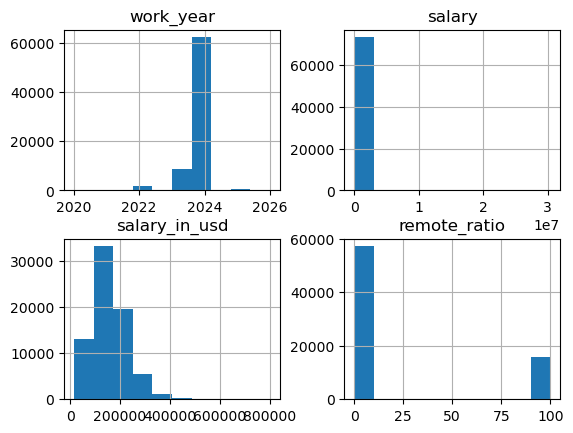

In [43]:
### Comando basicos de graficas de datos, el cual sin paremetros tomara cada columna numerica (Cuantitativa)
df.hist();

array([[<Axes: title={'center': 'work_year'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'salary_in_usd'}>,
        <Axes: title={'center': 'remote_ratio'}>]], dtype=object)

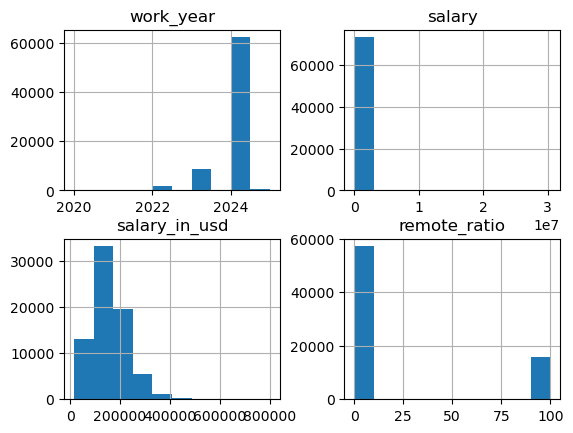

In [44]:
df_vacios_eliminados.hist()

Grafica de solo la columna de Año (Entrevista/Recoleccion)

array([[<Axes: title={'center': 'work_year'}>]], dtype=object)

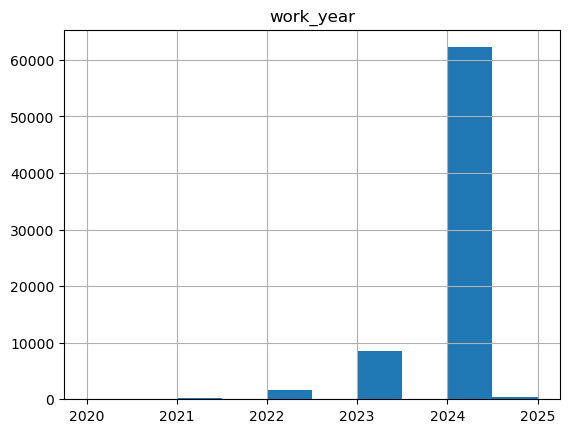

In [52]:
df_vacios_eliminados.hist(column='work_year')

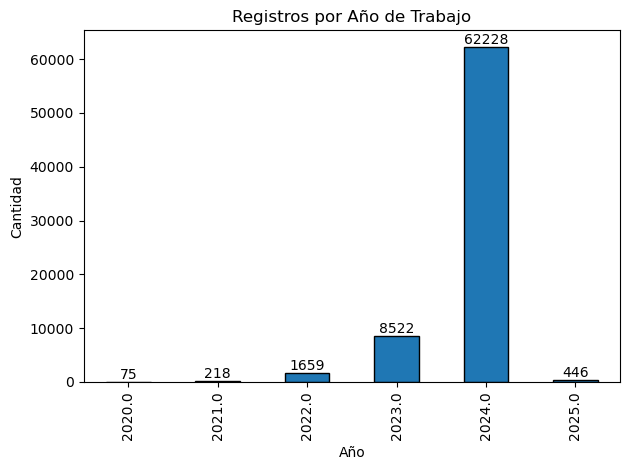

In [47]:
import matplotlib.pyplot as plt

# Contar cuántos registros hay por año
conteo = df_vacios_eliminados['work_year'].value_counts().sort_index()

# Graficar
conteo.plot(kind='bar', edgecolor='black')

# Agregar números exactos encima de cada barra
for i, valor in enumerate(conteo):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Etiquetas
plt.title('Registros por Año de Trabajo')
plt.xlabel('Año')
plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()

In [19]:
## aRREGLO DE LAS CATEGORIAS A GRAFICAR

analysis_categories = ['work_year', 'experience_level', 'employment_type', 'job_title',
                      'employee_residence', 'company_location','company_size']

## 
def_color= 'darkblue'

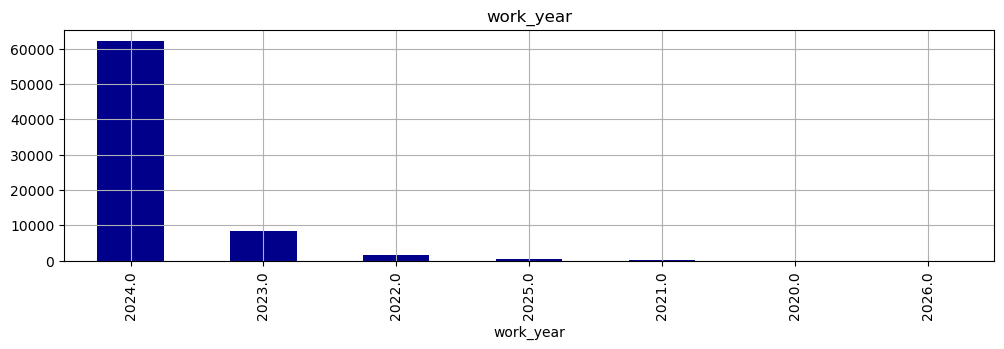

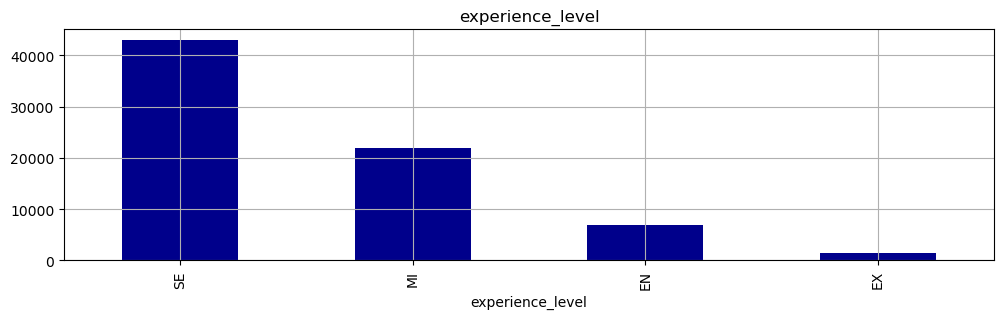

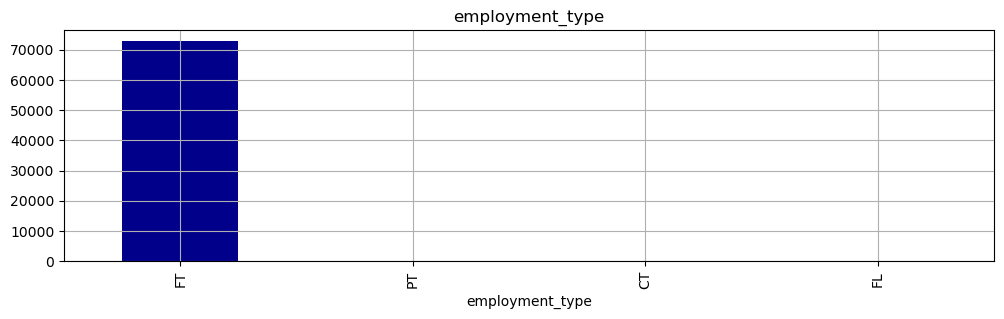

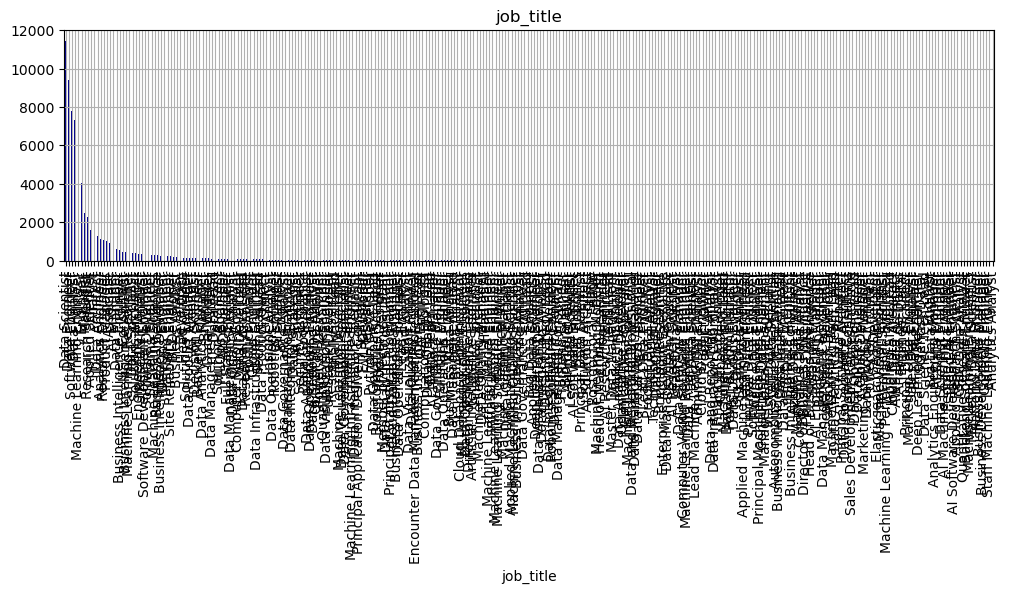

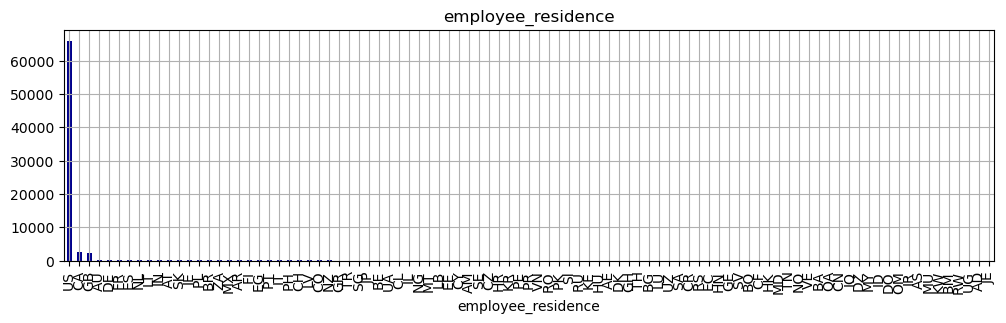

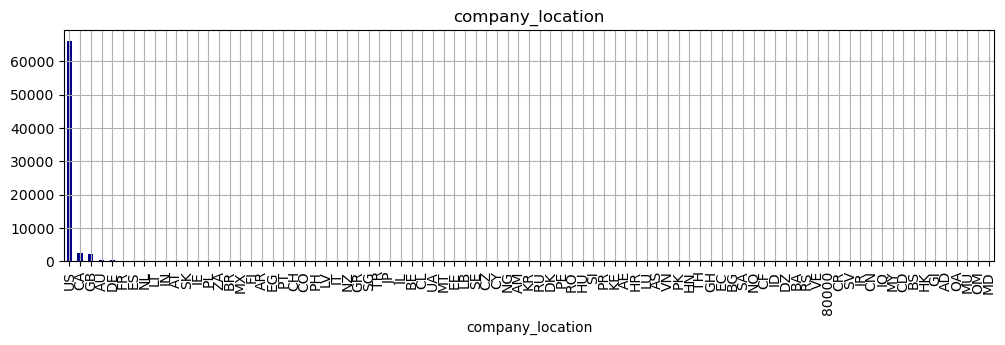

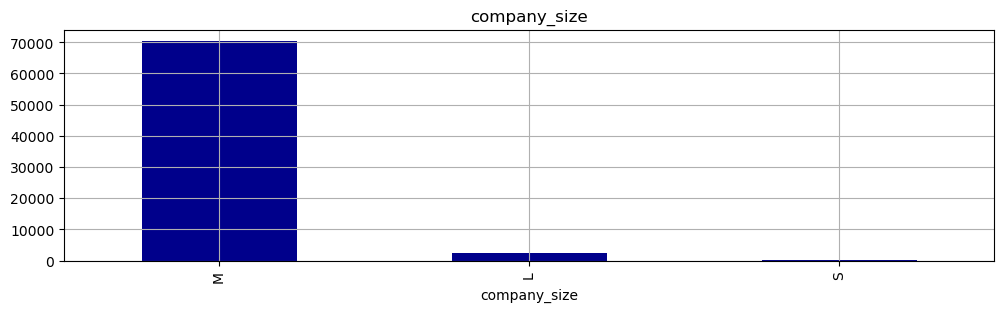

In [20]:
for f in analysis_categories:
    plt.figure(figsize=(12, 3))
    df[f].value_counts().plot(kind='bar', color=def_color)
    plt.title(f)
    plt.grid()
    plt.show()

## 5. Estadistica Avanzada

Calcular la medidas en tendencias central, de nuestro  dataframe 

In [55]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, mode

def calculate_statistics(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    stat_names = [
        'Mean', 'Median', 'Mode', 'Range', 'Stdev', 'Variance', 'IQR',
        '25%', '50%', '75%', 'Min', 'Max', 'Skewness', 'Kurtosis'
    ]

    stats_table = []

    for stat in stat_names:
        row = []
        for col in numeric_cols:
            data = df[col].dropna()
            if stat == 'Mean':
                value = data.mean()
            elif stat == 'Median':
                value = data.median()
            elif stat == 'Mode':
                value = mode(data, keepdims=True).mode[0] if not data.empty else np.nan
            elif stat == 'Range':
                value = data.max() - data.min()
            elif stat == 'Stdev':
                value = data.std()
            elif stat == 'Variance':
                value = data.var()
            elif stat == 'IQR':
                value = data.quantile(0.75) - data.quantile(0.25)
            elif stat == '25%':
                value = data.quantile(0.25)
            elif stat == '50%':
                value = data.quantile(0.50)
            elif stat == '75%':
                value = data.quantile(0.75)
            elif stat == 'Min':
                value = data.min()
            elif stat == 'Max':
                value = data.max()
            elif stat == 'Skewness':
                value = skew(data)
            elif stat == 'Kurtosis':
                value = kurtosis(data)
            else:
                value = np.nan
            row.append(round(value, 2) if not pd.isnull(value) else np.nan)
        stats_table.append(row)

    stats_df = pd.DataFrame(stats_table, columns=numeric_cols, index=stat_names)
    return stats_df

# Uso:
# Asegúrate de tener tu DataFrame listo y sin valores nulos:
# df_vacios_eliminados = df.dropna()
stats_df = calculate_statistics(df_vacios_eliminados)

# Mostrar la tabla completa
print(stats_df)

          work_year        salary  salary_in_usd  remote_ratio
Mean        2023.83  1.625534e+05   1.580138e+05         21.58
Median      2024.00  1.480000e+05   1.475000e+05          0.00
Mode        2024.00  1.600000e+05   1.600000e+05          0.00
Range          5.00  3.038600e+07   7.850000e+05        100.00
Stdev          0.48  1.925761e+05   7.250130e+04         41.02
Variance       0.23  3.708556e+10   5.256439e+09       1682.89
IQR            0.00  9.304250e+04   9.281000e+04          0.00
25%         2024.00  1.069575e+05   1.068900e+05          0.00
50%         2024.00  1.480000e+05   1.475000e+05          0.00
75%         2024.00  2.000000e+05   1.997000e+05          0.00
Min         2020.00  1.400000e+04   1.500000e+04          0.00
Max         2025.00  3.040000e+07   8.000000e+05        100.00
Skewness      -2.92  7.052000e+01   1.220000e+00          1.38
Kurtosis      11.13  9.051140e+03   3.980000e+00         -0.08
